<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Belt_Exam_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

from sklearn import set_config
set_config(display='diagram')
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/option_A_clustering_df - option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

In [ ]:
# copy
df_copy = df.copy()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

29

In [ ]:
# Drop duplicated rows
df_copy = df_copy.drop_duplicates()

In [ ]:
# check duplicates
df_copy.duplicated().sum()

0

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   int64  
 1   SqFt1stFloor        4915 non-null   int64  
 2   SqFtHalfFloor       4915 non-null   int64  
 3   SqFt2ndFloor        4915 non-null   int64  
 4   SqFtUpperFloor      4915 non-null   int64  
 5   SqFtTotLiving       4915 non-null   int64  
 6   SqFtTotBasement     4915 non-null   int64  
 7   SqFtFinBasement     4915 non-null   int64  
 8   SqFtGarageBasement  4915 non-null   int64  
 9   SqFtGarageAttached  4915 non-null   int64  
 10  DaylightBasement    4915 non-null   int64  
 11  SqFtOpenPorch       4915 non-null   int64  
 12  SqFtEnclosedPorch   4915 non-null   int64  
 13  SqFtDeck            4915 non-null   int64  
 14  BrickStone          4915 non-null   int64  
 15  Bedrooms            4915 non-null   int64  
 16  BathHa

In [ ]:
# check missing values
df_copy.isna().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [ ]:
# checking any inconsistent values
df_copy.describe(include= 'all')

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.915000e+03,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,...,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,6.645444e+05,1179.083418,51.959919,347.439064,26.524517,1937.448627,596.627874,334.984334,102.333672,170.879959,...,8.236623,148.607121,4.441913,3.379451,0.387792,0.627263,1.320244,1971.915768,-122.271623,47.572308
std,2.985774e+05,444.925946,174.811762,544.865685,114.672475,765.663840,567.978214,423.696071,187.330438,239.934554,...,37.495879,201.620800,18.695589,0.945969,0.506142,0.652341,0.610240,32.816671,0.086500,0.127344
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346012,47.488558
50%,6.300000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1966.000000,-122.291694,47.576855
75%,7.899500e+05,1450.000000,0.000000,580.000000,0.000000,2370.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,250.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2015.000000,-122.192353,47.680911
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


In [ ]:
# This for loop will check any inconsistent values in all columns

for col in df_copy:
    print(f'{col}:\n')
    print(df_copy[col].value_counts())
    print("\n\n")

SalePrice:

700000     65
650000     55
750000     48
350000     46
550000     46
           ..
389995      1
1064000     1
474250      1
815800      1
1214950     1
Name: SalePrice, Length: 1676, dtype: int64



SqFt1stFloor:

1010    69
1300    58
1100    57
1090    56
1200    55
        ..
2780     1
2460     1
1145     1
1771     1
1126     1
Name: SqFt1stFloor, Length: 304, dtype: int64



SqFtHalfFloor:

0       4421
500       17
700       13
420       13
600       12
        ... 
840        1
1080       1
441        1
728        1
130        1
Name: SqFtHalfFloor, Length: 114, dtype: int64



SqFt2ndFloor:

0       3105
430       40
480       37
530       35
570       35
        ... 
2107       1
2060       1
441        1
2090       1
1126       1
Name: SqFt2ndFloor, Length: 235, dtype: int64



SqFtUpperFloor:

0       4646
520       15
430       15
530       14
450       13
500       13
390       11
440       11
510       10
400       10
460        9
550        9
290        8



 SalePrice 



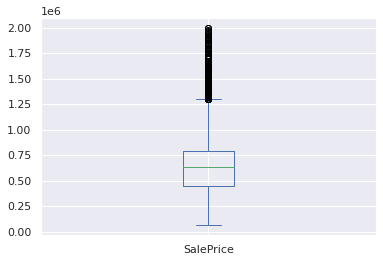


 SqFt1stFloor 



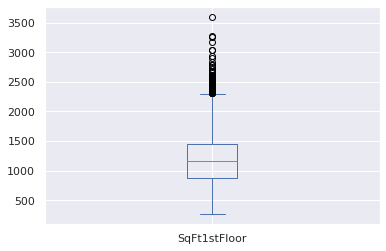


 SqFtHalfFloor 



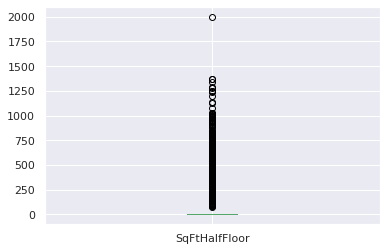


 SqFt2ndFloor 



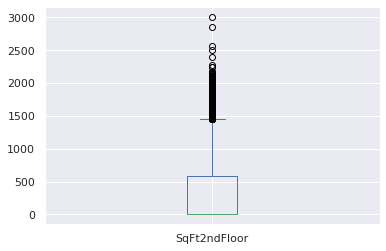


 SqFtUpperFloor 



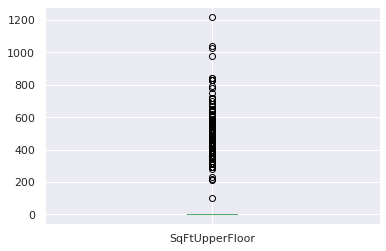


 SqFtTotLiving 



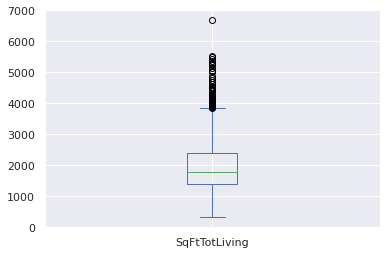


 SqFtTotBasement 



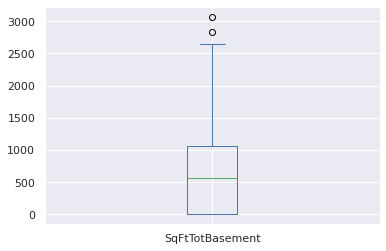


 SqFtFinBasement 



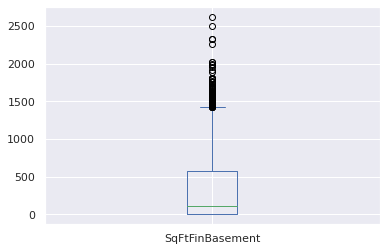


 SqFtGarageBasement 



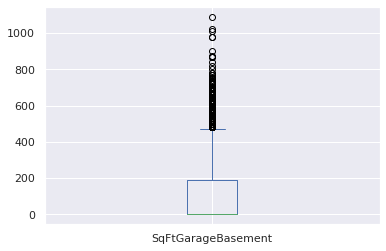


 SqFtGarageAttached 



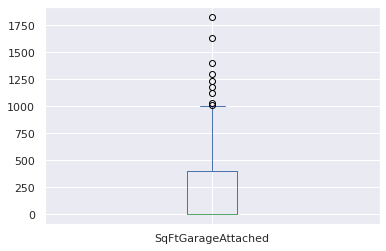


 DaylightBasement 



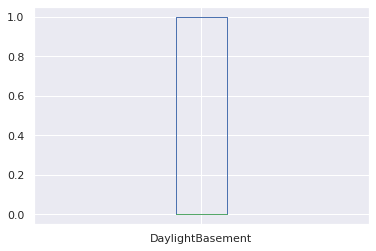


 SqFtOpenPorch 



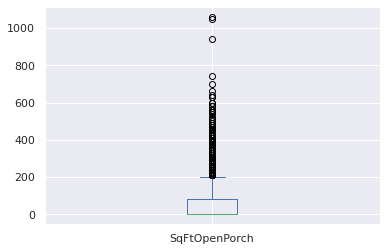


 SqFtEnclosedPorch 



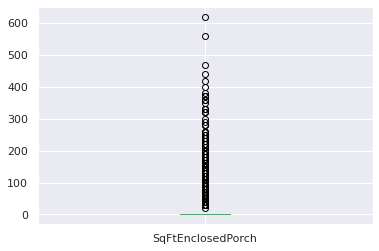


 SqFtDeck 



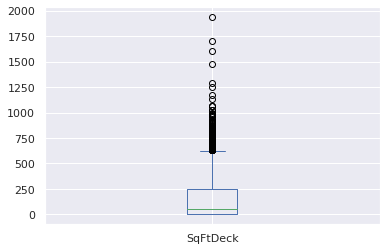


 BrickStone 



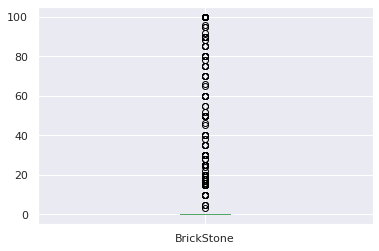


 Bedrooms 



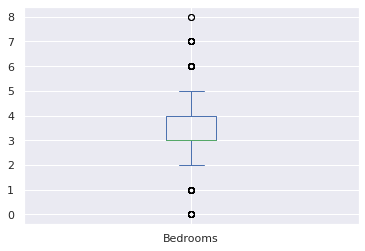


 BathHalfCount 



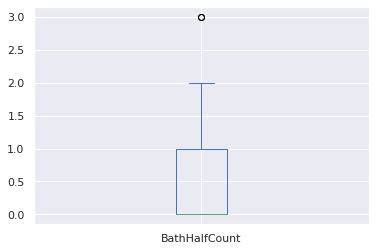


 Bath3qtrCount 



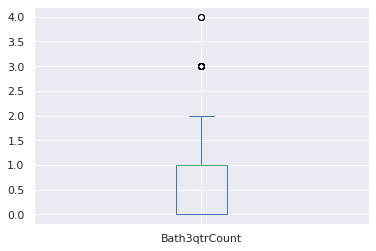


 BathFullCount 



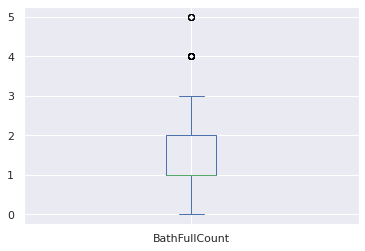


 YrBuilt 



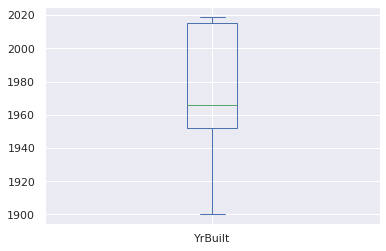

CPU times: user 6.05 s, sys: 108 ms, total: 6.16 s
Wall time: 6.16 s


In [ ]:
# explore numeric distributions via boxplots to see outliers
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  df_copy[col].plot(kind='box')
  plt.show()


 SalePrice 



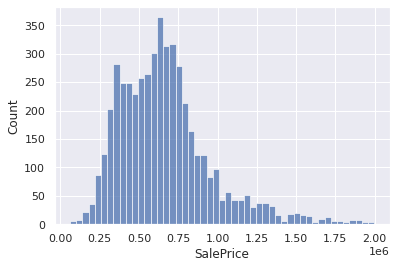


 SqFt1stFloor 



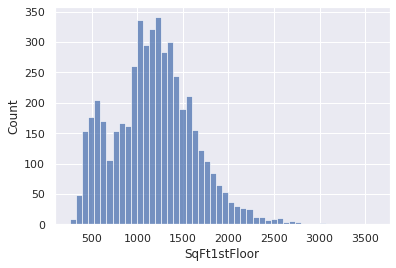


 SqFtHalfFloor 



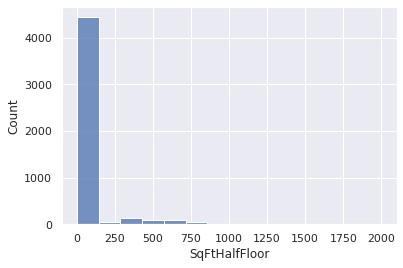


 SqFt2ndFloor 



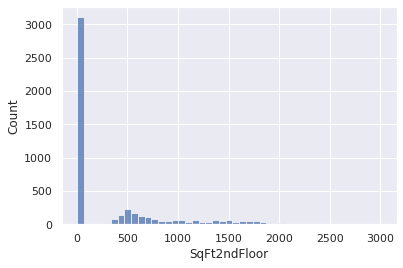


 SqFtUpperFloor 



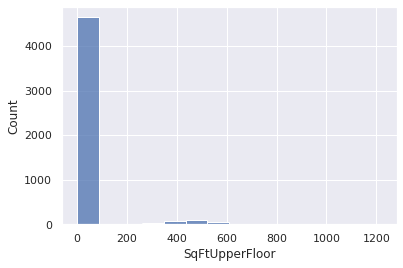


 SqFtTotLiving 



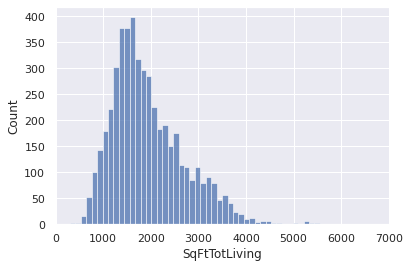


 SqFtTotBasement 



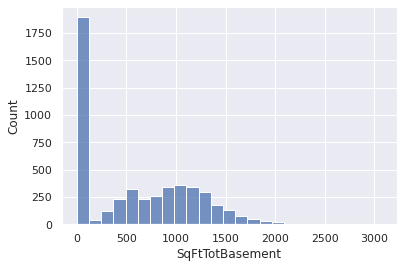


 SqFtFinBasement 



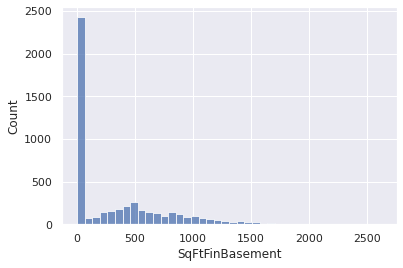


 SqFtGarageBasement 



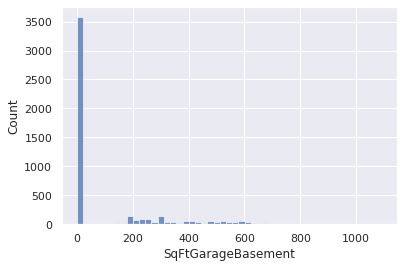


 SqFtGarageAttached 



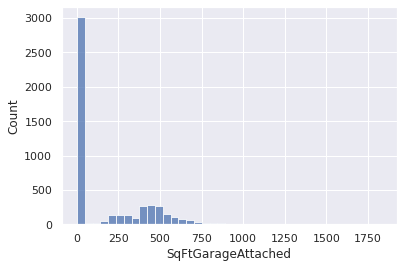


 DaylightBasement 



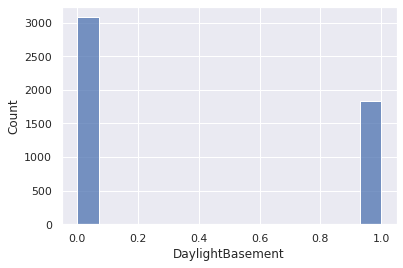


 SqFtOpenPorch 



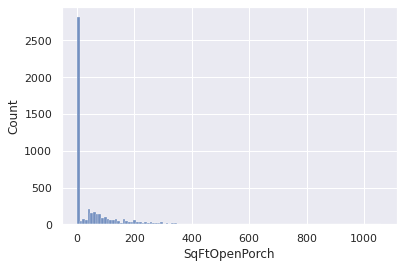


 SqFtEnclosedPorch 



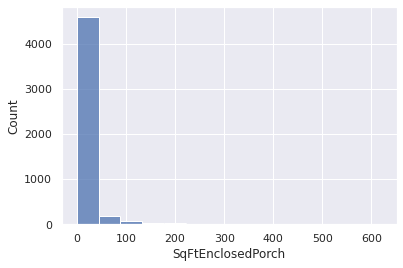


 SqFtDeck 



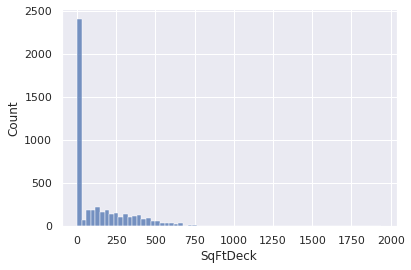


 BrickStone 



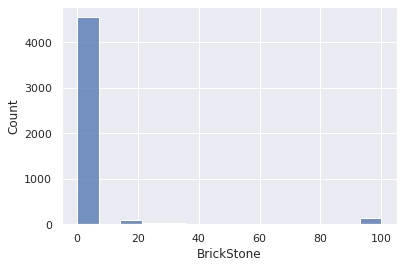


 Bedrooms 



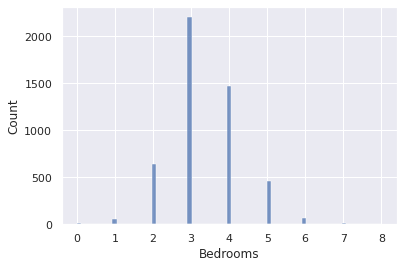


 BathHalfCount 



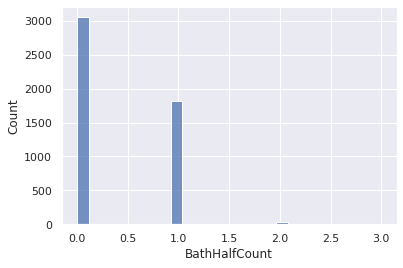


 Bath3qtrCount 



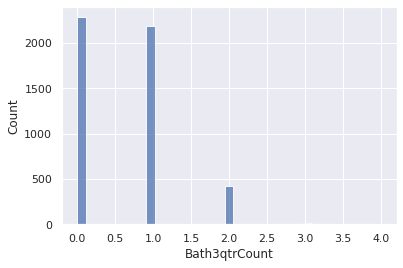


 BathFullCount 



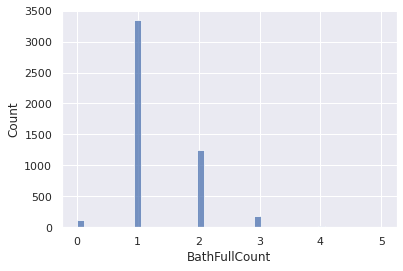


 YrBuilt 



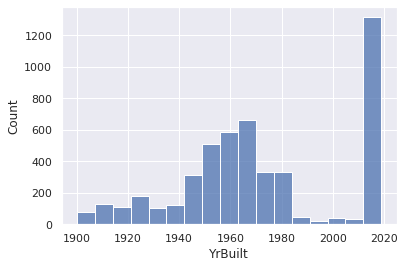

CPU times: user 15.4 s, sys: 252 ms, total: 15.6 s
Wall time: 15.5 s


In [ ]:
%%time
for col in df_copy.select_dtypes('int64'):
  print('\n', col, '\n')
  sns.set(style="darkgrid")
  sns.histplot(data=df_copy, x=col, palette="ch:.10");
  plt.show()

# Feature Engineering

I tried to engineer features for hours!  

There are a lot of outliers.  It looks like they are not accidential.   I ran everything with the outliers then I tried data engineering.

There are also a lot of rows that have a lot of zeros. I converted them to binary features. That is, if there is a porch I made that a 1 and no porch I made that a 0.  Square footage doesn't seem to add much value.

I tried log of sale price and square footage.  

After hours of work, I succeeded in lowering my R2 values by 10%.  So I removed all the data engineering.  I need to read up on how to do this better.

Note:  I did add ratio of bathrooms to bedrooms in the modeling workbook and it helped!  However, I ran out of time to add it back in for the clustering.

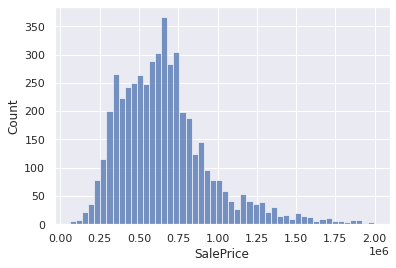

In [ ]:
g=sns.histplot(data=df_copy,
             x='SalePrice',
             stat='count',
             bins=50, );

In [ ]:
# The GPS coordinates are unique.  I will visualize the house location on a map
# I got this from https://www.youtube.com/watch?v=fv8NlZfUPG4
# Thanks, Josh!

# Note that later on I am going to use this map as one of my visualizations along with
# my clusters on the map


import plotly.express as px

px.scatter_mapbox(df_copy, lat = 'Latitude', lon = 'Longitude', color = 'SalePrice', mapbox_style = 'open-street-map', width=500, height=500)

There are clear geographic distinctions in home values.  I tried adding the clusters as a feature (after the test/train split to avoid data leakage, natch.)  I ran the model with and without the cluster feature and with and without the GPS data.  All my fancy feature engineering did was lower the R2 so I got rid of all of it.

In [ ]:
# I got this here: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

# I want 'SalePrice' to be the last column in the dataset

cols = list(df_copy.columns.values)
cols

['SalePrice',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'YrBuilt',
 'Longitude',
 'Latitude']

In [ ]:
df_copy = df_copy[[
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'YrBuilt',
 'Longitude',
 'Latitude',
 'SalePrice']]

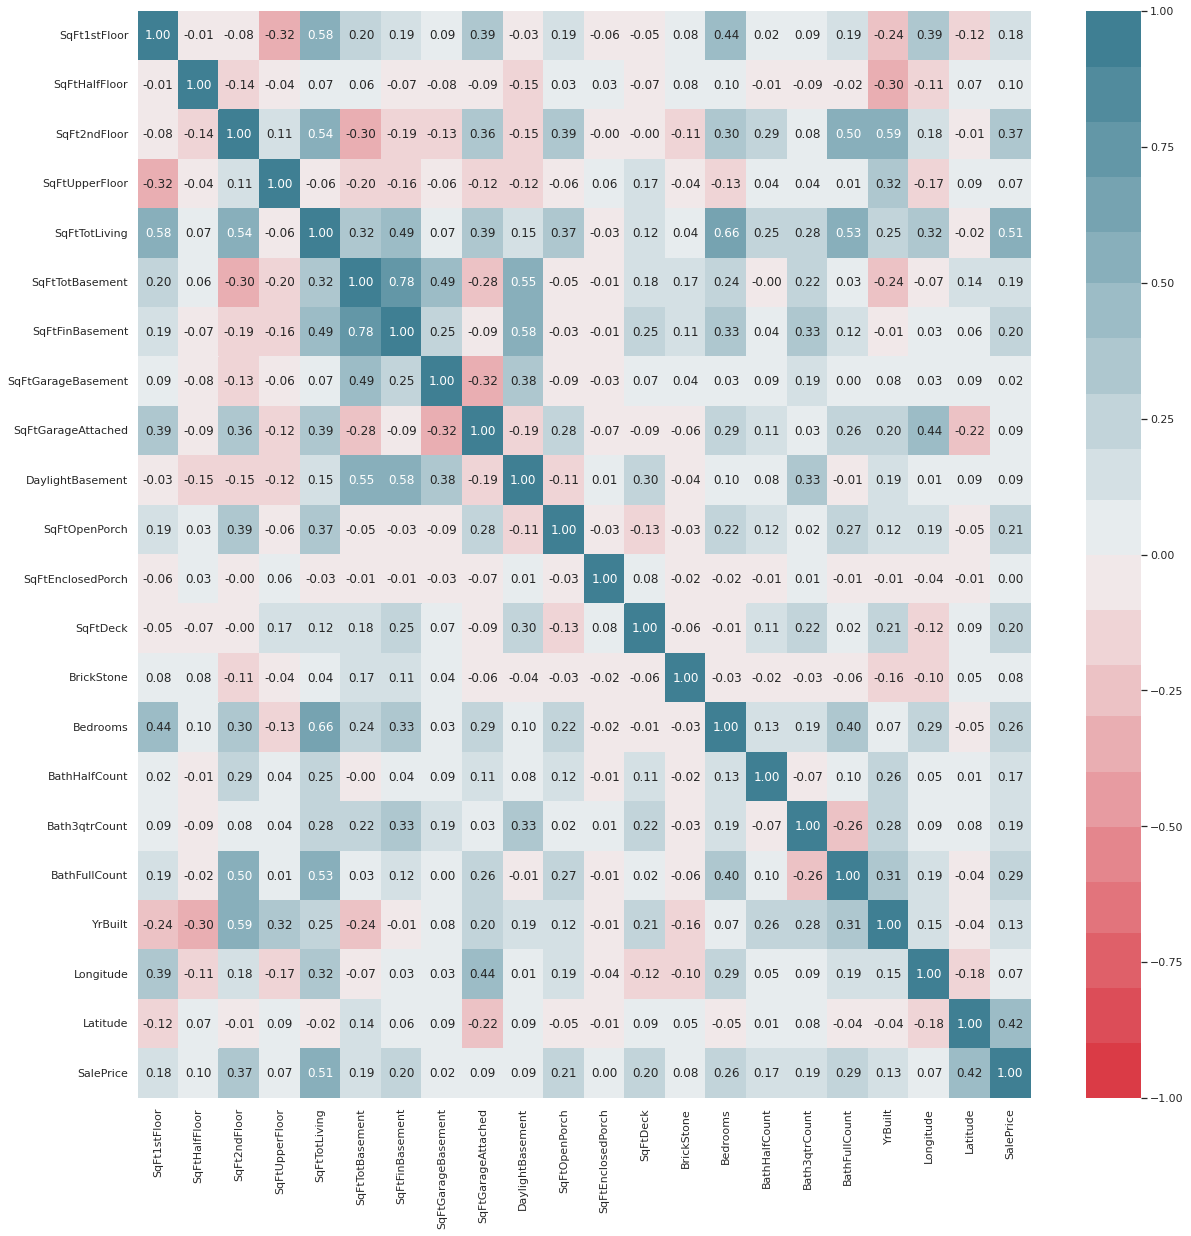

In [ ]:
corr = df_copy.corr()
plt.figure(figsize = (20,20));
sns.heatmap(corr, cmap=sns.diverging_palette(10, 220, n=20), annot = True, vmin=-1, vmax=1, center=0,fmt='.2f');

#Segmenting/Clustering

In [ ]:
df_ml = df_copy.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SqFt1stFloor        4915 non-null   int64  
 1   SqFtHalfFloor       4915 non-null   int64  
 2   SqFt2ndFloor        4915 non-null   int64  
 3   SqFtUpperFloor      4915 non-null   int64  
 4   SqFtTotLiving       4915 non-null   int64  
 5   SqFtTotBasement     4915 non-null   int64  
 6   SqFtFinBasement     4915 non-null   int64  
 7   SqFtGarageBasement  4915 non-null   int64  
 8   SqFtGarageAttached  4915 non-null   int64  
 9   DaylightBasement    4915 non-null   int64  
 10  SqFtOpenPorch       4915 non-null   int64  
 11  SqFtEnclosedPorch   4915 non-null   int64  
 12  SqFtDeck            4915 non-null   int64  
 13  BrickStone          4915 non-null   int64  
 14  Bedrooms            4915 non-null   int64  
 15  BathHalfCount       4915 non-null   int64  
 16  Bath3q

In [ ]:
# instantiate the Scaler, OneHotEncoder, and Imputers
# The final dataset doesn't have any cagetorical features.  However, I played around with
# lots of data engineering and used all the features.  I simplified the code
# for the modeling but left it here to tinker with the segmenting.

scaler = MinMaxScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# We

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

# Instantiate PCA
pca = PCA(n_components=.95)

# Setup the pipelines for the numeric and categorical data
num_pipeline = make_pipeline(mean_imputer, pca, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop')

# Fit the column transformer on the X_train
preprocessor.fit(df_ml)

# Transform the X_train and the X_test

df_ml_transformed = preprocessor.transform(df_ml)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(df_ml_transformed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in df_ml_transformed are', df_ml_transformed.dtype)
print('\n')
print('shape of data is', df_ml_transformed.shape)
print('\n')
df_ml_transformed

0 missing values in training data


All data in df_ml_transformed are float64


shape of data is (4915, 1)




array([[0.17544046],
       [0.21375207],
       [0.31370059],
       ...,
       [0.30701761],
       [0.44891687],
       [0.59594983]])

## Silhouette Score and Inertia

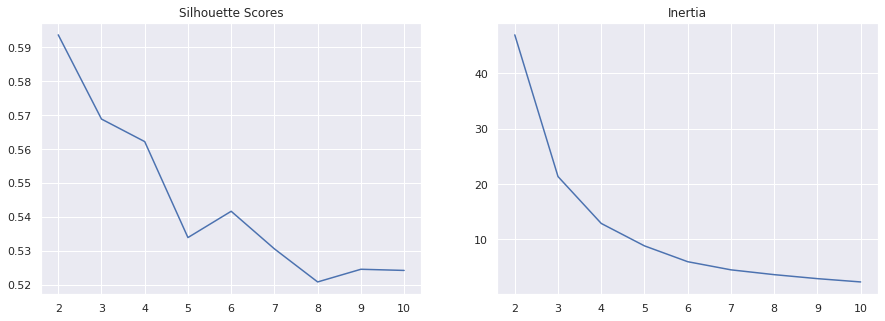

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_ml_transformed)
  sils.append(silhouette_score(df_ml_transformed, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

The highest point on the Silhouette score is 2 indicating that there should be 2 clusters.

The Inertia chart does not show any clear elbows.

I am going to choose 2 clusters.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_ml_transformed)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df_ml['Cluster'] = kmeans.labels_

In [ ]:
cluster_groups_km = df_ml.groupby('Cluster', as_index=False).mean()
cluster_groups_km

,Cluster,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,SalePrice
0,0,1125.970365,41.444794,272.997115,25.978495,1765.498820,552.590611,301.811172,101.993181,156.319696,...,135.767899,3.637293,3.256491,0.355363,0.580121,1.252557,1971.662208,-122.276982,47.556717,5.404666e+05
1,1,1362.858439,88.343013,605.013612,28.413793,2532.407441,749.000000,449.765880,103.511797,221.259528,...,193.031760,7.225953,3.804900,0.500000,0.790381,1.554446,1972.793103,-122.253083,47.626256,1.093863e+06


In [ ]:
df_ml['Cluster'].value_counts()

0    3813
1    1102
Name: Cluster, dtype: int64

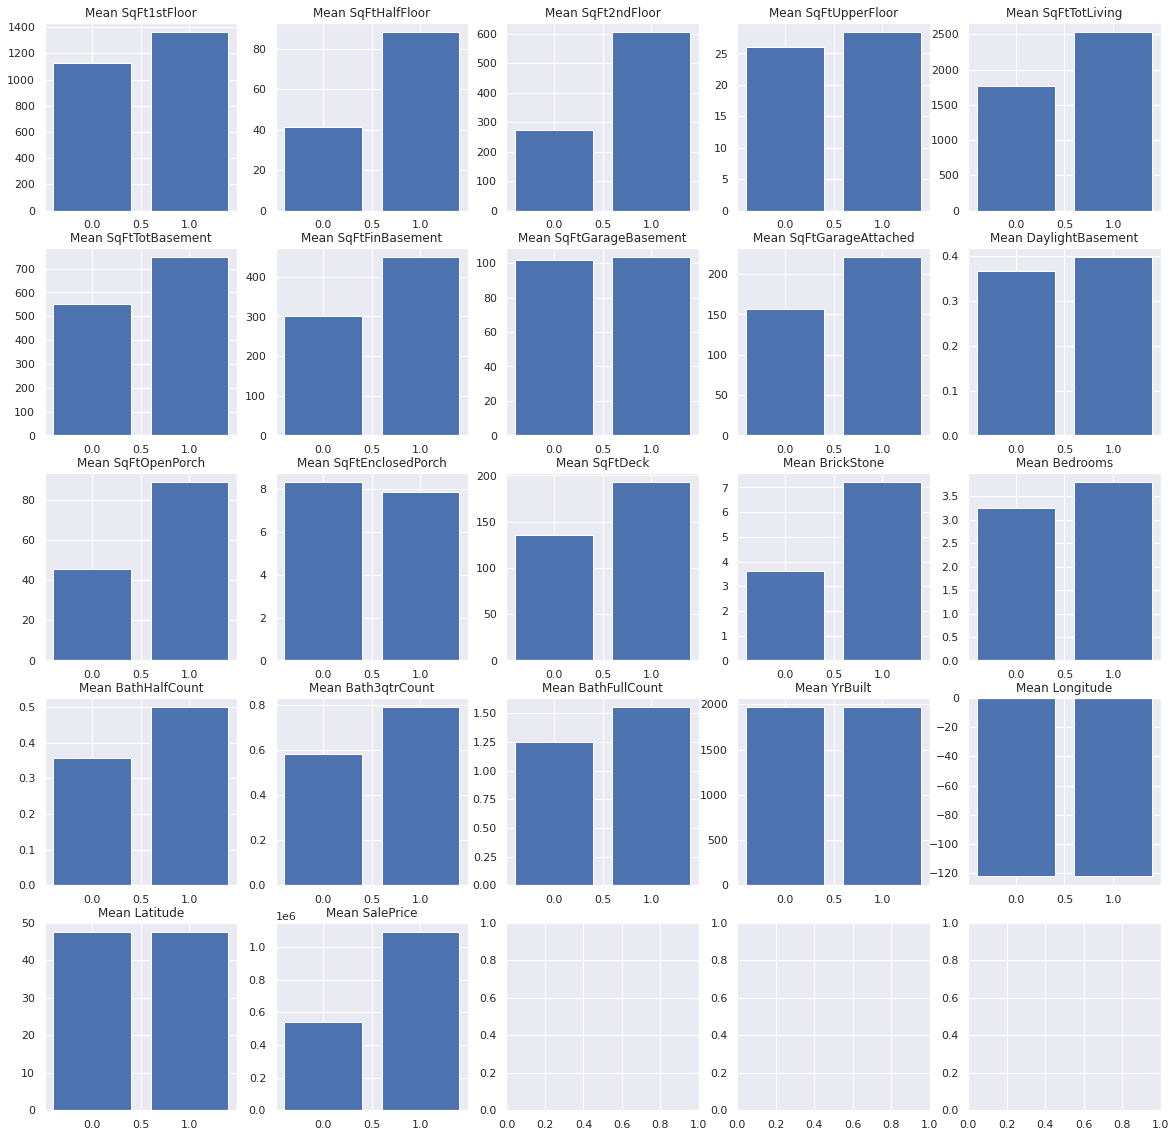

In [ ]:
# Visualize means
fig, axes = plt.subplots(5,5, figsize = (20, 20))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups_km.columns[1:]):
  axes[i].bar(cluster_groups_km['Cluster'], cluster_groups_km[col])
  axes[i].set_title(f'Mean {col}')

The clustering algo pointed to two clusters.  They segment the houses into two buckets - large expensive houses in the center of the city and smaller, less expensive houses further away from the center of the city.  

Maybe a useful new data point would be who works for Microsoft and Amazon.  Looks like we just segmented tech gazillionaires from the regular working stiffs.  

Good motivation for learning machine learning!!

In [ ]:
import plotly.express as px

px.scatter_mapbox(df_ml, lat = 'Latitude', lon = 'Longitude', color = 'Cluster', mapbox_style = 'open-street-map', width=500, height=500)

The following map shows home values.  The preceeding map shows the calculated clusters.  Note that the clustering algo accruately separated out the high priced homes from the smaller, lower priced homes.

In [ ]:
import plotly.express as px

px.scatter_mapbox(df_ml, lat = 'Latitude', lon = 'Longitude', color = 'SalePrice', mapbox_style = 'open-street-map', width=500, height=500)

In [ ]:
cluster = {0: 'Cluster 1', 1:'Cluster 2'}

df_ml['Cluster'] = df_ml['Cluster'].replace(cluster)
df_ml['Cluster'].value_counts()

Cluster 1    3813
Cluster 2    1102
Name: Cluster, dtype: int64

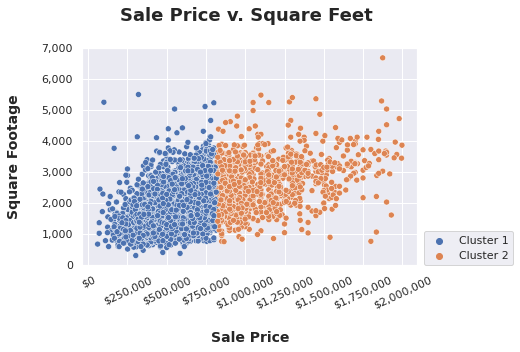

In [ ]:
fig = plt.figure(1)
sns.set(style="darkgrid")

ax = sns.scatterplot(data = df_ml, x = 'SalePrice', y = 'SqFtTotLiving', hue = 'Cluster')
ax.legend(bbox_to_anchor=[1,1]);

# Title and labels
plt.title('Sale Price v. Square Feet \n', fontsize = 18, weight='bold');
plt.xlabel('\nSale Price', fontsize = 14, weight='bold');

# x- and y- ticks
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.xticks(rotation=25)
sqr =  '{x:,.0f}'
ytick = mtick.StrMethodFormatter(sqr)
ax.yaxis.set_major_formatter(ytick)

plt.ylabel('Square Footage\n', fontsize = 14, weight='bold');
plt.legend(loc=(1.02,0));


Home sale price is very closely correlated with home square footage.  Please note the clear line at about $800,000 that separates the two clusters.

# New Section